# Weather Data from London
- Andrea Cohen
-03.27.23

## Data

- Source
    - https://www.kaggle.com/datasets/emmanuelfwerr/london-weather-data
- Context
    - The dataset was created by reconciling measurements from requests of individual weather attributes provided by the European Climate Assessment (ECA). The measurements of this particular dataset were recorded by a weather station near Heathrow airport in London, UK.
- Content
    1. date - recorded date of measurement - (int)
    2. cloud_cover - cloud cover measurement in oktas - (float)
    3. sunshine - sunshine measurement in hours (hrs) - (float)
    4. global_radiation - irradiance measurement in Watt per square meter (W/m2) - (float)
    5. max_temp - maximum temperature recorded in degrees Celsius (°C) - (float)
    6. mean_temp - mean temperature in degrees Celsius (°C) - (float)
    7. min_temp - minimum temperature recorded in degrees Celsius (°C) - (float)
    8. precipitation - precipitation measurement in millimeters (mm) - (float)
    9. pressure - pressure measurement in Pascals (Pa) - (float)
    10. snow_depth - snow depth measurement in centimeters (cm) - (float)
- Modified Version
    - Share URL:
        - https://docs.google.com/spreadsheets/d/1J2hEGA1-ZOdXOc1Go2AjB7xShq-nAvIDpBz_XRZscHU/edit?usp=sharing
    - Raw URL:
        - https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv 

## Preliminary Steps

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

### Load the data

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv')
display(df.head())
display(df.info())

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


None

### Convert the date column to datetime dtype

In [3]:
pd.to_datetime(df['date'])

0       1970-01-01 00:00:00.019790101
1       1970-01-01 00:00:00.019790102
2       1970-01-01 00:00:00.019790103
3       1970-01-01 00:00:00.019790104
4       1970-01-01 00:00:00.019790105
                     ...             
15336   1970-01-01 00:00:00.020201227
15337   1970-01-01 00:00:00.020201228
15338   1970-01-01 00:00:00.020201229
15339   1970-01-01 00:00:00.020201230
15340   1970-01-01 00:00:00.020201231
Name: date, Length: 15341, dtype: datetime64[ns]

In [4]:
df['date'].sample(n=10).sort_index()

296      19791024
1935     19840419
5840     19941228
6654     19970321
7796     20000506
8420     20020120
10281    20070224
11082    20090505
12759    20131207
13784    20160927
Name: date, dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

### Set the date column as the index

In [6]:
df = df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


### Filter out only the required data:
    - Keep only data from the year 2000 or later.
    - Keep only the following features:
        - precipitation
        - mean_temp
        - min_temp
        - max_temp
        - snow_depth

In [7]:
df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
display(df.head())
display(df.tail())

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN
2020-12-30,0.0,2.7,-0.1,5.6,NaN
2020-12-31,0.0,-0.8,-3.1,1.5,NaN


### Impute any missing values

In [8]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

- There are 390 missing values in precipitation:
    - interpolate
    - the interpolated value would likely be closest to the correct value that is missing
- There are 419 missing values in mean_temp:
    - interpolate
    - the interpolated value would likely be closest to the correct value that is missing
- There are 386 missing values in min_temp:
    - interpolate
    - the interpolated value would likely be closest to the correct value that is missing
- There are 390 missing values in max_temp:
    - interpolate
    - the interpolated value would likely be closest to the correct value that is missing
- There are 1752 missing values in snow_depth:
    - interpolate
    - the interpolated value would likely be closest to the correct value that is missing

In [9]:
df['precipitation'] = df['precipitation'].interpolate()
df['mean_temp'] = df['mean_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['snow_depth'] = df['snow_depth'].interpolate()
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

- There are now 0 missing values.

### What month had the most precipitation between 2000 through 2010?

Make a temporary DataFrame

In [10]:
temp_df = df.loc['2000':'2010', ['precipitation']].copy()
display(temp_df.head())
display(temp_df.tail())

,precipitation
date,
2000-01-01,0.0
2000-01-02,0.2
2000-01-03,6.0
2000-01-04,0.2
2000-01-05,0.8


,precipitation
date,
2010-12-27,5.0
2010-12-28,0.4
2010-12-29,1.4
2010-12-30,0.0
2010-12-31,0.0


#### Resample the data as monthly frequency

In [11]:
temp_df_monthly = temp_df.resample("MS").max()
temp_df_monthly.head()

,precipitation
date,
2000-01-01,6.0
2000-02-01,16.8
2000-03-01,7.2
2000-04-01,17.2
2000-05-01,19.0


#### Find the date and corresponding value for the max precipitation

In [12]:
max_date = temp_df['precipitation'].idxmax()
max_date

Timestamp('2000-10-29 00:00:00')

In [13]:
df.loc[max_date]

precipitation    36.6
mean_temp        10.6
min_temp          7.8
max_temp         11.3
snow_depth        0.0
Name: 2000-10-29 00:00:00, dtype: float64

- The date with the maximum precipitation was 2000-10-29.
- The maximum precipitation value was 36.6 mm.

#### Plot the feature and time period

Create a wide figure 

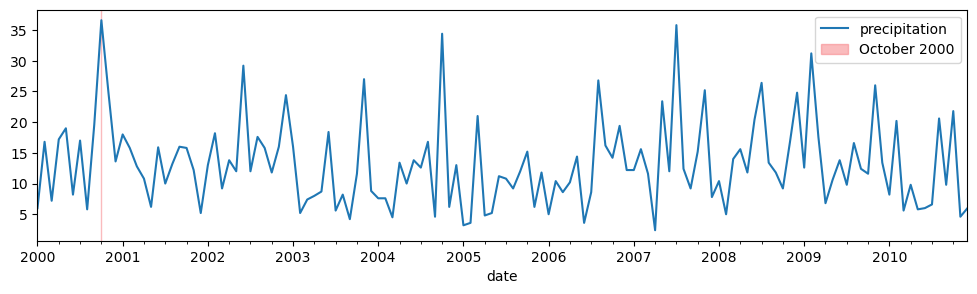

In [14]:
plt.rcParams['figure.figsize'] = (12,3)
ax = temp_df_monthly.plot()
ax.axvspan('2000-10-01', '2000-10-31', color = '#f7797d', alpha = 0.5, zorder = 0, label = 'October 2000')
ax.legend();

With a title of "Precipitation for 2000-2010"

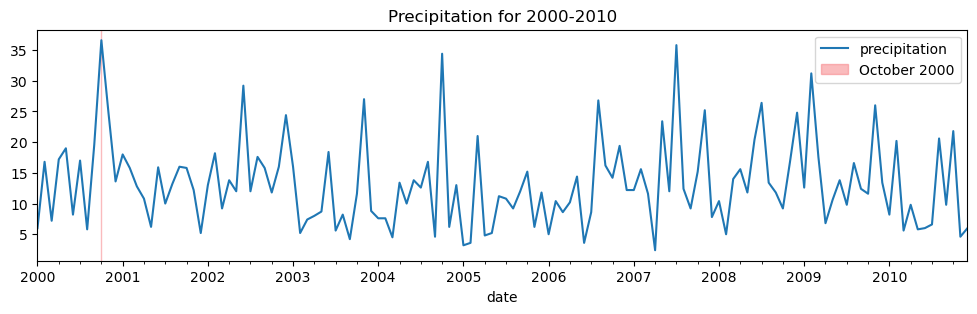

In [15]:
fig, ax = plt.subplots()
temp_df_monthly.plot(ax = ax, title = 'Precipitation for 2000-2010')
ax.axvspan('2000-10-01', '2000-10-31', color = '#f7797d', alpha = 0.5, zorder = 0, label = 'October 2000')
ax.legend();

With a ylabel of "Inches"

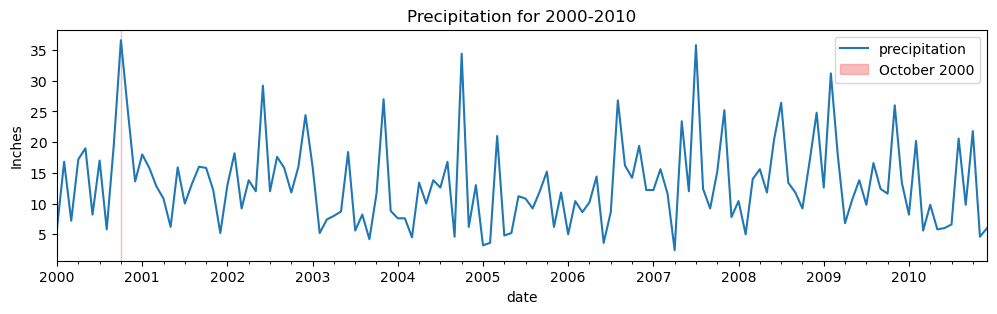

In [16]:
fig, ax = plt.subplots()
temp_df_monthly.plot(ax = ax, title = 'Precipitation for 2000-2010', ylabel = 'Inches')
ax.axvspan('2000-10-01', '2000-10-31', color = '#f7797d', alpha = 0.5, zorder = 0, label = 'October 2000')
ax.legend();

Customize the major xaxis ticks to:
- Have major xaxis ticks every 1 year
- Use 4-digit years for the labels
- Have the major ticks' labels rotated 90 degrees

In [17]:
loc_year = mdates.YearLocator(1)
fmt_year = mdates.DateFormatter("%Y")

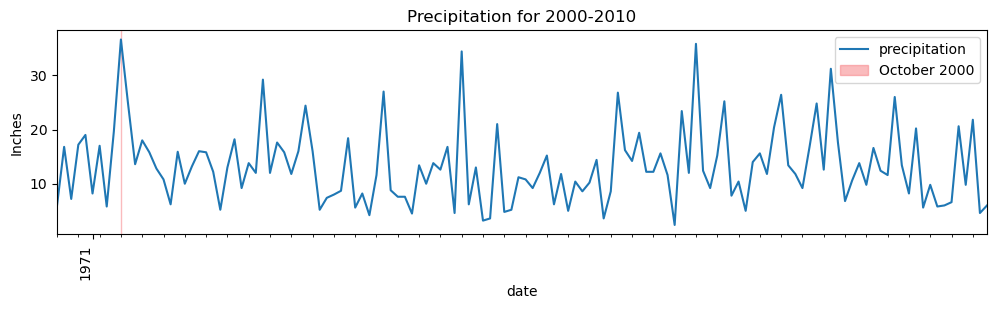

In [38]:
fig, ax = plt.subplots()
ax = temp_df_monthly.plot(ax = ax, title = 'Precipitation for 2000-2010', ylabel = 'Inches')
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
ax.axvspan('2000-10-01', '2000-10-31', color = '#f7797d', alpha = 0.5, zorder = 0, label = 'October 2000')
ax.legend();
fig = ax.get_figure()
fig.autofmt_xdate(rotation = 90)

Customize the minor xaxis ticks to:
- Have minor xaxis ticks every 3 months
- Do not label the minor ticks

In [19]:
loc_3months = mdates.MonthLocator(interval = 3)

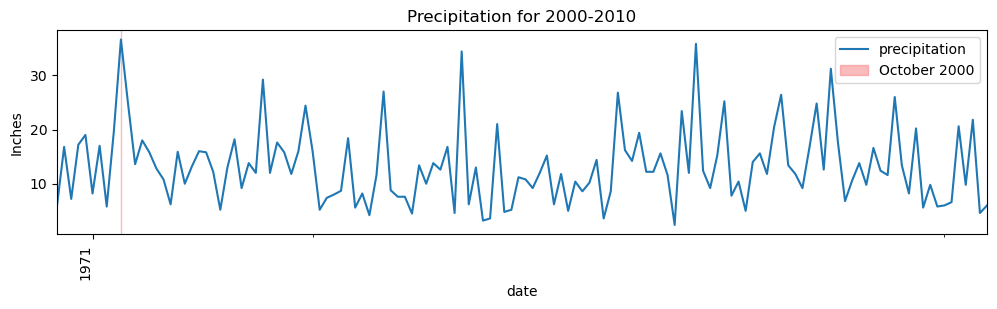

In [20]:
fig, ax = plt.subplots()
ax = temp_df_monthly.plot(ax = ax, title = 'Precipitation for 2000-2010', ylabel = 'Inches')
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
ax.xaxis.set_minor_locator(loc_3months)
ax.axvspan('2000-10-01', '2000-10-31', color = '#f7797d', alpha = 0.5, zorder = 0, label = 'October 2000')
ax.legend();
fig = ax.get_figure()
fig.autofmt_xdate(rotation = 90)

#### Determine the date and value for the most precipitation

In [21]:
df.loc[max_date]

precipitation    36.6
mean_temp        10.6
min_temp          7.8
max_temp         11.3
snow_depth        0.0
Name: 2000-10-29 00:00:00, dtype: float64

#### Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value

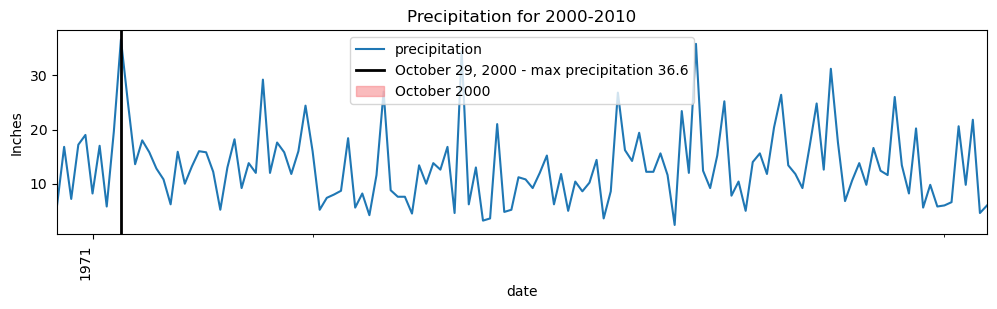

In [22]:
fig, ax = plt.subplots()
ax = temp_df_monthly.plot(ax = ax, title = 'Precipitation for 2000-2010', ylabel = 'Inches')
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)
ax.xaxis.set_minor_locator(loc_3months)
ax.axvline(max_date, color = 'k', lw = 2, ls = '-', label = 'October 29, 2000 - max precipitation 36.6')
ax.axvspan('2000-10-01', '2000-10-31', color = '#f7797d', alpha = 0.5, zorder = 0, label = 'October 2000')
ax.legend();
fig = ax.get_figure()
fig.autofmt_xdate(rotation = 90)

### Which year between 2000-2020 had the coolest average temperature?

Make a temporary DataFrame

In [23]:
temp_df2 = df.loc['2000':'2020', ['mean_temp']].copy()
display(temp_df2.head())
display(temp_df2.tail())

,mean_temp
date,
2000-01-01,7.0
2000-01-02,7.9
2000-01-03,9.4
2000-01-04,7.0
2000-01-05,6.4


,mean_temp
date,
2020-12-27,7.5
2020-12-28,1.1
2020-12-29,2.6
2020-12-30,2.7
2020-12-31,-0.8


#### Resample the data as yearly frequency

In [24]:
temp_df_yearly = temp_df2.resample("AS").mean()
temp_df_yearly.head()

,mean_temp
date,
2000-01-01,11.575683
2001-01-01,11.331507
2002-01-01,12.084247
2003-01-01,12.114521
2004-01-01,11.900683


#### Find the date and corresponding value for the min mean temp

In [25]:
min_temp_date = temp_df2['mean_temp'].idxmin()
min_temp_date

Timestamp('2010-12-20 00:00:00')

In [26]:
df.loc[min_temp_date]

precipitation    0.0
mean_temp       -4.1
min_temp        -9.4
max_temp         1.8
snow_depth       5.0
Name: 2010-12-20 00:00:00, dtype: float64

- The date with the minimum mean temperature was 2010-12-20.
- The minimum mean temperature value was -4.1 degrees Celsius.

#### Plot the feature and time period

Create a wide figure

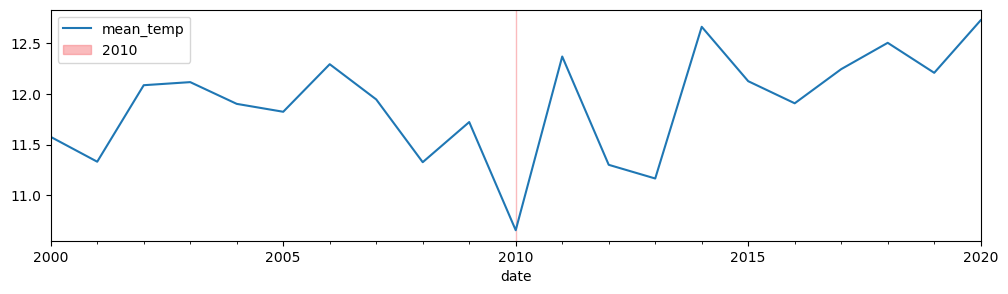

In [27]:
plt.rcParams['figure.figsize'] = (12,3)
ax = temp_df_yearly.plot()
ax.axvspan('2010-01-01', '2010-12-31', color = '#f7797d', alpha = 0.5, zorder = 0, label = '2010')
ax.legend();

With a title of "Average Temperature"

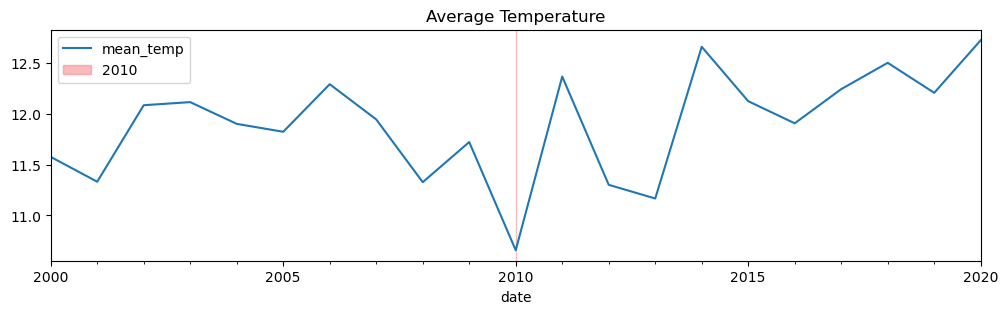

In [28]:
fig, ax = plt.subplots()
temp_df_yearly.plot(ax = ax, title = 'Average Temperature')
ax.axvspan('2010-01-01', '2010-12-31', color = '#f7797d', alpha = 0.5, zorder = 0, label = '2010')
ax.legend();

With a ylabel of "Degrees"

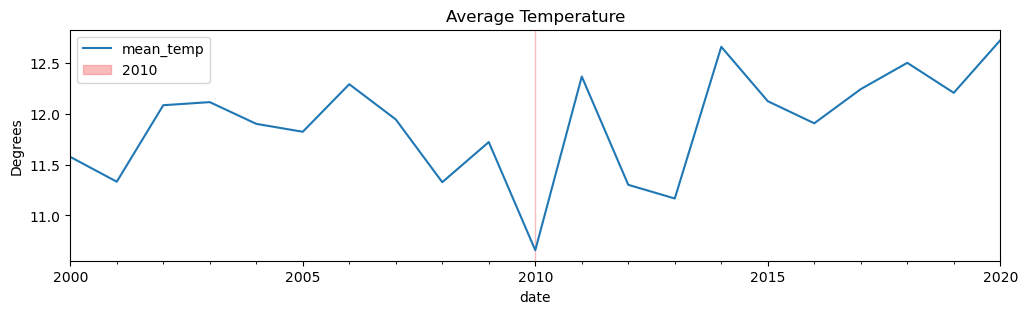

In [29]:
fig, ax = plt.subplots()
temp_df_yearly.plot(ax = ax, title = 'Average Temperature', ylabel = 'Degrees')
ax.axvspan('2010-01-01', '2010-12-31', color = '#f7797d', alpha = 0.5, zorder = 0, label = '2010')
ax.legend();

Customize the major xaxis ticks to:
- Have major xaxis ticks every 5 years
- Use 4-digit years for the labels
- Have the major ticks' labels rotated 90 degrees

In [30]:
loc_year2 = mdates.YearLocator(5)
fmt_year2 = mdates.DateFormatter("%Y")

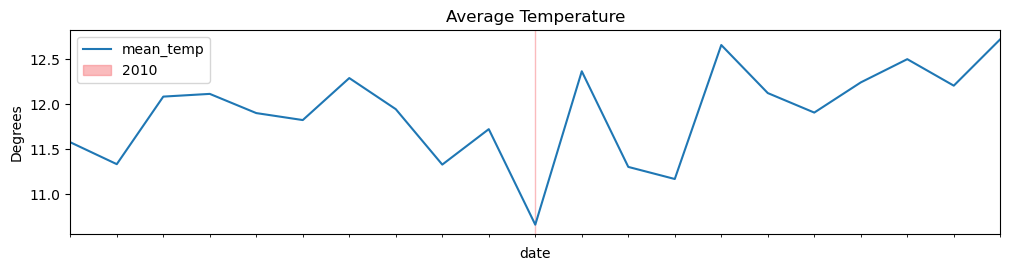

In [31]:
fig, ax = plt.subplots()
ax = temp_df_yearly.plot(ax = ax, title = 'Average Temperature', ylabel = 'Degrees')
ax.xaxis.set_major_locator(loc_year2)
ax.xaxis.set_major_formatter(fmt_year2)
ax.axvspan('2010-01-01', '2010-12-31', color = '#f7797d', alpha = 0.5, zorder = 0, label = '2010')
ax.legend();
fig = ax.get_figure()
fig.autofmt_xdate(rotation = 90)

Customize the minor xaxis ticks to:
- Have minor xaxis ticks every 1 year
- Do not label the minor ticks

In [32]:
loc_year3 = mdates.YearLocator(1)

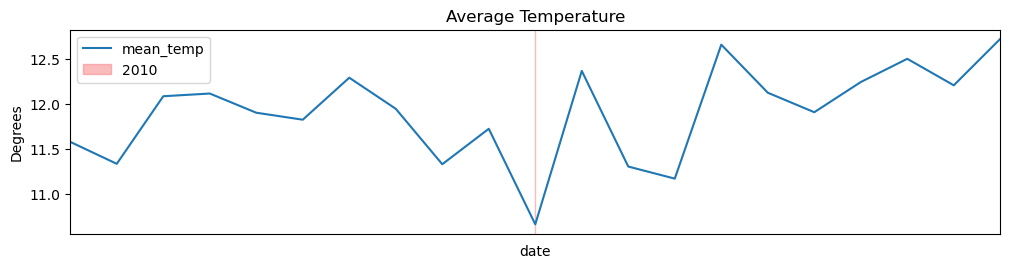

In [33]:
fig, ax = plt.subplots()
ax = temp_df_yearly.plot(ax = ax, title = 'Average Temperature', ylabel = 'Degrees')
ax.xaxis.set_major_locator(loc_year2)
ax.xaxis.set_major_formatter(fmt_year2)
ax.xaxis.set_minor_locator(loc_year3)
ax.axvspan('2010-01-01', '2010-12-31', color = '#f7797d', alpha = 0.5, zorder = 0, label = '2010')
ax.legend();
fig = ax.get_figure()
fig.autofmt_xdate(rotation = 90)

#### Determine the date and value for the lowest mean temp

In [34]:
df.loc[min_temp_date]

precipitation    0.0
mean_temp       -4.1
min_temp        -9.4
max_temp         1.8
snow_depth       5.0
Name: 2010-12-20 00:00:00, dtype: float64

#### Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temp value

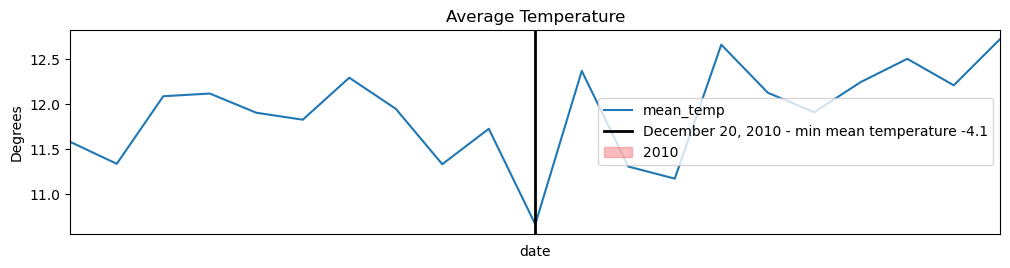

In [35]:
fig, ax = plt.subplots()
ax = temp_df_yearly.plot(ax = ax, title = 'Average Temperature', ylabel = 'Degrees')
ax.xaxis.set_major_locator(loc_year2)
ax.xaxis.set_major_formatter(fmt_year2)
ax.xaxis.set_minor_locator(loc_year3)
ax.axvline(min_temp_date, color = 'k', lw = 2, ls = '-', label = 'December 20, 2010 - min mean temperature -4.1')
ax.axvspan('2010-01-01', '2010-12-31', color = '#f7797d', alpha = 0.5, zorder = 0, label = '2010')
ax.legend();
fig = ax.get_figure()
fig.autofmt_xdate(rotation = 90)

#### What was the temperature?

In [36]:
min_mean_temp = temp_df2['mean_temp'].min()
print(f'The lowest mean temperature was {min_mean_temp}.')

The lowest mean temperature was -4.1.
